<img src='https://dr-hkim.github.io/assets/article_images/FILES_2018-11-26-Naver-News-Word-Cloud-in-R/Rplot.png' style="width:50px;">

위의 그림 처럼 인터넷 게시글이나, 텍스트 파일에 등장하는 단어들의 빈도를 계산해서, 중요한(등장 횟수가 큰) 단어는 크게 표현하고 그렇지 않은 것은 작게 표현하는 것을 워드 클라우드라고 합니다.
워드 클라우드를 사용하면 텍스트 분석 결과를 시각화 할 때, 전달력이 올라가므로 사용법을 익혀 두면 유용합니다.
<br>
- 대개 한국 학생들은 한글 문서 분석과 영문자 분석을 하게 되는데, 그 중 한글 문서 분석을 하려면 konlpy 라는 라이브러리를 설치해야 합니다. 
- konlpy 는 한글 형태소 분석기라고 하는데, 한글 문서를 형태소 단위로 분석하는데 사용됩니다.
- 영어는 대부분 띄어쓰기 단위로 단어의 의미가 완전히 구분되는데, 한글은 '조사'라는 개념이 있어서 글을 형태소 단위로 분해해야 합니다. 그래서 형태소 분석기를 사용합니다.
- 또한 워드클라우드가 영어베이스라서 한글 표현이 잘 되지 않는 문제가 있습니다. 이를 해결하기 위해 한글 폰트인 나눔 서체를 먼저 설치하고 시작합니다.
- 마지막 부분에서 형태소 분해 없이 워드클라우드를 만들어 보겠습니다. 

# 1단계 : 한글폰트 설치
- 아래 부분은  Google Colab에서 한글폰트를 설치하는 과정입니다.
- 코드창 셀에 붙여넣기 해서 실행하세요
- 워드 클라우드나, 그래프에서 한글을 사용하려면 필요합니다.

In [1]:
!apt-get update -qq
!apt-get install fonts-nanum*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


# 2단계 : 워드 클라우드 설치
 - colab에서 한글 형태소 분석기인 konlpy를 설치합니다.

In [2]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#워드클라우드 임포트
from wordcloud import wordcloud

#그래프처리를 위한 라이브러리 임포트
import matplotlib.pyplot as plt

#한글 형태소 분석기 임포트, 트위터 제공모듈
from konlpy.tag import Okt
okt = Okt()

#카운팅 모듈 불러오기
from collections import Counter

# 3단계 : 설치 테스트
- 다음 코드를 실행시켜 봅니다.
- 실행이 잘 되면 한글 형태소 분석기 설치가 잘 마무리 된 것입니다.

In [4]:
print(okt.pos('아버지가 방에 들어가신다.'))
print(okt.pos('아버지가방에들어가신다.'))

[('아버지', 'Noun'), ('가', 'Josa'), ('방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb'), ('.', 'Punctuation')]
[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb'), ('.', 'Punctuation')]


- Noun 은 명사, Josa는 조사.. 등등입니다.
- 띄어쓰기의 중요성을 알 수 있습니다.

#4단계 - 한글 텍스트 기사를 텍스트 파일로 가져오기
- 다음 링크에서 [무정](https://drive.google.com/file/d/1mazKpaYvZfGGxklkeatYG7nQZHv47JFa/view?usp=sharing) 본문을 다운 받습니다.<br>
- 혹은 원하는 기사를 적당하게 복사하여 메모장을 열고 붙여 넣고 저장(utf-8)합니다. 
- 파일명은 찾기 쉬운 이름으로합니다. .
- 코랩 노트북 왼쪽 상단 메뉴를 보시면 돋보기 아이콘, < >, 폴더아이콘이 있습니다. 폴더 아이콘을 클릭합니다.<br>
- 그러면 버튼 세개가 나오는데 그 중 첫번째가 파일 업로드 버튼<br>
- 파일 업로드 버튼을 클릭하여 앞에서 저장한 파일을 업로드 합니다.<br>

- 코드는 복붙 하시면 됩니다. 

#5단계 - 업로드한 텍스트 파이썬에서 불러오기
- 업로드한 파일을 불러오는 내용
- 무정.txt 부분을 자신이 업로드한 파일명에 맞게 수정합니다.

In [5]:
#코랩에서 데이터 파일을 사용하기 위해 직접 업로드하는 코드
from google.colab import files
file_uploaded=files.upload()

In [6]:
#파이썬을 이용해 텍스트 파일 읽어들이기
#구글 드라이브에 있는 파일 불러오는 부분
f=open('무정.txt', 'r', encoding='UTF-8')
line=f.readline()           #한 줄만 읽어들임
print(line)                 #읽어온 줄 출력

string=f.read()                  #본문의 내용을 문자열로 저장
print(string)                   #전체 보여주기(옵션)



무정(無情)
이광수
1

경성학교 영어 교사 이형식은 오후 두시 사년급 영어 시간을 마치고 내려쪼이는 유월 볕에 땀을 흘리면서 안동 김장로의 집으로 간다. 김장로의 딸 선형(善馨)이가 명년 미국 유학을 가기 위하여 영어를 준비할 차로 이형식을 매일 한 시간씩 가정교사로 고빙하여 오늘 오후 세시부터 수업을 시작하게 되었음이라. 이형식은 아직 독신이라, 남의 여자와 가까이 교제하여 본 적이 없고 이렇게 순결한 청년이 흔히 그러한 모양으로 젊은 여자를 대하면 자연 수줍은 생각이 나서 얼굴이 확확 달며 고개가 저절로 숙여진다. 남자로 생겨나서 이러함이 못생겼다면 못생겼다고도 하려니와, 여자를 보면 아무러한 핑계를 얻어서라도 가까이 가려 하고, 말 한마디라도 하여 보려 하는 잘난 사람들보다는 나으리라. 형식은 여러 가지 생각을 한다. 우선 처음 만나서 어떻게 인사를 할까. 남자 남자 간에 하는 모양으로, 󰡐처음 보입니다. 저는 이형식이올시다󰡑 이렇게 할까. 그러나 잠시라도 나는 가르치는 자요, 저는 배우는 자라, 그러면 미상불 무슨 차별이 있지나 아니할까. 저편에서 먼저 내게 인사를 하거든 그제야 나도 인사를 하는 것이 마땅하지 아니할까. 그것은 그러려니와 교수하는 방법은 어떻게나 할는지. 어제 김장로에게 그 청탁을 들은 뒤로 지금껏 생각하건마는 무슨 묘방이 아니 생긴다. 가운데 책상을 하나 놓고, 거기 마주앉아서 가르칠까. 그러면 입김과 입김이 서로 마주치렷다. 혹 저편 히사시가미(양갈래로 딴 머릿단)가 내 이마에 스칠 때도 있으렷다. 책상 아래에서 무릎과 무릎이 가만히 마주 닿기도 하렷다. 이렇게 생각하고 형식은 얼굴이 붉어지며 혼자 빙긋 웃었다. 아니 아니? 그러다가 만일 마음으로라도 죄를 범하게 되면 어찌하게. 옳다? 될 수 있는 대로 책상에서 멀리 떠나 앉겠다. 만일 저편 무릎이 내게 닿거든 깜짝 놀라며 내 무릎을 치우리라. 그러나 내 입에서 무슨 냄새가 나면 여자에게 대하여 실례라, 점심 후에는 아직 담배는 아니 먹었건마는, 하고 손으로 입을 가리우고 입

- string=f.read()
- 분석을 하기 위해 파일의 내용을 한번에 문자열로 바꿉니다.

#6단계 - 텍스트의 정규화 실행

- 정규화 실행. normalize는 정규화 처리를 해주는 함수입니다. 쉽게 생각해서 어지럽여진 문장을 깔끔하게 만들어준다는 생각을 하면 됩니다. 
- 예시로 "안녕하세욬ㅋ"의 경우 "안녕하세요ㅋ"로 "샤릉해"는 "사랑해"로 변환합니다.
- 정규화 처리를 하게 되면, 단어의 개수를 줄일 수 있어서 자연어 처리 성능을 얻을 수 있을것입니다.

In [7]:
#정규화 예제입니다.
example_normal = okt.normalize('샤릉해')
print(example_normal)

사랑해


In [8]:
#string으로 저장된 내용 정규화
string = okt.normalize(string)
print(string)

무정(無情)
이광수
1

경성학교 영어 교사 이형식은 오후 두시 사년급 영어 시간을 마치고 내려쪼이는 유월 볕에 땀을 흘리면서 안동 김장로의 집으로 간다. 김장로의 딸 선형(善馨)이가 명년 미국 유학을 가기 위하여 영어를 준비할 차로 이형식을 매일 한 시간씩 가정교사로 고빙하여 오늘 오후 세시부터 수업을 시작하게 되었음이라. 이형식은 아직 독신이라, 남의 여자와 가까이 교제하여 본 적이 없고 이렇게 순결한 청년이 흔히 그러한 모양으로 젊은 여자를 대하면 자연 수줍은 생각이 나서 얼굴이 확확 달며 고개가 저절로 숙여진다. 남자로 생겨나서 이러함이 못생겼다면 못생겼다고도 하려니와, 여자를 보면 아무러한 핑계를 얻어서라도 가까이 가려 하고, 말 한마디라도 하여 보려 하는 잘난 사람들보다는 나으리라. 형식은 여러 가지 생각을 한다. 우선 처음 만나서 어떻게 인사를 할까. 남자 남자 간에 하는 모양으로, 󰡐처음 보입니다. 저는 이형식이올시다󰡑 이렇게 할까. 그러나 잠시라도 나는 가르치는 자요, 저는 배우는 자라, 그러면 미상불 무슨 차별이 있지나 아니할까. 저편에서 먼저 내게 인사를 하거든 그제야 나도 인사를 하는 것이 마땅하지 아니할까. 그것은 그러려니와 교수하는 방법은 어떻게나 할는지. 어제 김장로에게 그 청탁을 들은 뒤로 지금껏 생각하건마는 무슨 묘방이 아니 생긴다. 가운데 책상을 하나 놓고, 거기 마주앉아서 가르칠까. 그러면 입김과 입김이 서로 마주치렸다. 혹 저편 히사시가미(양갈래로 딴 머릿단)가 내 이마에 스칠 때도 있으렸다. 책상 아래에서 무릎과 무릎이 가만히 마주 닿기도 하렸다. 이렇게 생각하고 형식은 얼굴이 붉어지며 혼자 빙긋 웃었다. 아니 아니? 그러다가 만일 마음으로라도 죄를 범하게 되면 어찌하게. 옳다? 될 수 있는 대로 책상에서 멀리 떠나 앉겠다. 만일 저편 무릎이 내게 닿거든 깜짝 놀라며 내 무릎을 치우리라. 그러나 내 입에서 무슨 냄새가 나면 여자에게 대하여 실례라, 점심 후에는 아직 담배는 아니 먹었건마는, 하고 손으로 입을 가리우고 입김을

#7단계 - 문자열을 형태소 단위로 분해
- okt 에 대한 자세한 내용은 검색찬스 쓰시고
- okt.pos() 가 형태소 단위로 문자열을 분석합니다.

In [9]:
#형태소 분석
okt_pos = okt.pos(string, norm = True, stem = True)
print(okt_pos)

Output hidden; open in https://colab.research.google.com to view.

#9단계 - 필터링 및 불용어, 한 글자 형태소 제거
- 한 글자 형태소 제거는 필요 없을 수도 있습니다.
- 불용어도 상황에 맞게 리스트로 정리해야 합니다.

In [17]:
#명사, 형용사, 동사, 형용사, 부사, 알파벳만 필터링
okt_filtered=[x for x, y in okt_pos if y in ['Noun', 'Adjective', 'Verb', 'Adverb']]
# okt_filtered=[x for x, y in okt_pos if y in ['Noun', 'Adjective', 'Verb', 'Adverb', 'Alpha']]

#불용어, 한글자 형태소 제거
unused=['것', '수', '이','나', '너', '하다','듯', '년', '있다', '되다','정말','같다','은', '그', '의','잠']

for i,v in enumerate(okt_filtered):
    if v in unused:
        okt_filtered.pop(i)
print(okt_filtered)

['무정', '이광수', '경성', '학교', '영어', '교사', '이형식', '오후', '두시', '년', '영어', '시간', '마치', '내다', '쪼이다', '유월', '볕', '땀', '흘리다', '안동', '김', '장로', '집', '간다', '김', '장로', '딸', '선형', '명년', '미국', '유학', '가기', '위', '영어', '준비', '차로', '이형식', '매일', '시간', '가정교사', '빙하', '오늘', '오후', '세시', '수업', '시작', '되어다', '이르다', '이형식', '아직', '독신', '남', '여자', '가까이', '교제', '보다', '적', '없다', '이렇게', '순결하다', '청년', '흔하다', '그러하다', '모양', '젊다', '여자', '대하', '자연', '수줍다', '생각', '나서다', '얼굴', '확확', '달다', '고개', '저절로', '숙이다', '남자', '생겨나다', '이러하다', '생기다', '생기다', '여자', '보다', '아무러하다', '핑계', '얻다', '어서', '가까이', '가다', '말', '한마디', '보다', '잘나다', '사람', '낫다', '형식', '여러', '가지', '생각', '우선', '처음', '만나다', '어떻다', '인사', '남자', '남자', '간', '모양', '처음', '보이다', '저', '이형식', '오다', '이렇게', '잠시', '가르치다', '자', '저', '배우다', '자라', '그러면', '미상불', '무슨', '차별', '아니다', '저편', '먼저', '내다', '인사', '거들다', '그제야', '나다', '인사', '것', '마땅하다', '아니다', '그것', '그렇다', '교수', '방법', '어떻다', '어제', '김', '장로', '청탁', '들다', '뒤', '지금껏', '생각', '건마는', '무슨', '묘방', '아니다', '생기다', '가운데', '책상', '하나', '놓다', '거기', '

#10. 카운팅
- wordList 안에 있는 단어들이 몇개씩 있는지 리스트로 만듭니다. 
- wordCount={} 딕셔너리라는 자료 구조 입니다. 데이터 분석할 때 종종 나오게 됩니다. [딕셔너리 문법 참고](https://wikidocs.net/16)

In [11]:
#카운팅, 정렬 하는 부분


In [12]:
# key 순으로 정렬

#정렬 결과 출력


In [13]:
#빈도순 상위 10개 출력


#워드 클라우드 생성
- 워드클라우드와 matplotlib를 임포트 해야 합니다.

In [14]:
#워드 클라우드

#그래프 처리를 위한 라이브러리

#빈도수를 이용하여 워드 클라우드 생성 : dict(noun_list) - 빈도수 튜플로 사전 생성해서 넘겨주고 워드 클라우드 생성

#이미지 사이즈 지정


 #이미지의 부드럽기 정도
 #x y 축 숫자 제거
plt.show()

#워드 클라우드를 원하는 테두리에 넣기
- 전문용어로 마스크(mask)를 이용한다고 표현합니다.
- 아래와 같은 그림의 검은색 영역안에 워드클라우드를 만들어 보겠습니다.
- 아래 그림을 다른이름으로 저장하고, 파일명을 mask.png로 저장합니다.
- 그리고 위의 무정.txt 파일처럼 구글 드라이브에 업로드 합니다. 


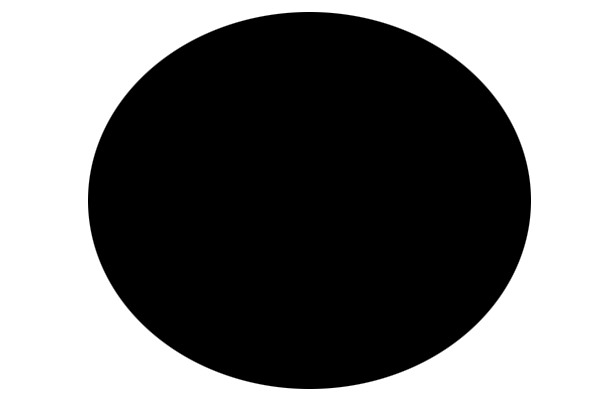

In [15]:
#코랩에서 데이터 파일을 사용하기 위해 직접 업로드하는 코드


In [16]:
#이미지 마스크를 이용해 원하는 모양으로 만들기
#이미지 다루는 라이브러리
from PIL import Image
#이미지를 배열로 만드는 라이브러리
import numpy as np

mask=np.array(Image.open('mask (3).png'))
#빈도수를 이용하여 워드 클라우드 생성 : dict(noun_list) - 빈도수 튜플로 사전 생성해서 넘겨주고 워드 클라우드 생성


#이미지 사이즈 지정
plt.figure(figsize=(10,10))


plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show()

FileNotFoundError: ignored

# 형태소 분해 없이 워드 클라우드 만들기
- 시간이 없을 때 사용합니다.
- 빈도수 세는 과정 같은거 자동으로 처리합니다.
